read data

In [1]:
import pandas as pd
from pathlib import Path
import os

directory = Path(os.getcwd())   # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\HKUST-x-J.P.-Morgan-Fintech-Mentorship-Program\\model_testing\\supervised'
directory = directory.parent.parent.joinpath("data")  # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\data'
df = pd.read_pickle(directory.joinpath("stocktwits_processed_sample.pkl"))
df

,text,time,symbols
0,it’s so easy to see insiders buying before th...,1639643526,$GOEV
1,it’s so easy to see insiders buying before th...,1639643526,$AAPL
2,Santa’s rally has an address to visit : “1...,1639643425,$QQQ
3,Santa’s rally has an address to visit : “1...,1639643425,$AAPL
4,Santa’s rally has an address to visit : “1...,1639643425,$SPY
...,...,...,...
76591,suggested for US ARCA Major Markets - val...,1640145541,$XMI
76592,and similar charts. We will see $180,1640143905,$SQ
76593,and similar charts. We will see $180,1640143905,$V
76594,damn putting in some work last couple of weeks..,1640139998,$V


Stocks distribution

In [2]:
df['symbols'].value_counts()

$TSLA     20215
$AAPL      9178
$FB        5650
$PYPL      5133
$MSFT      4739
          ...  
$CIOXY        1
$TIGR         1
$SSY          1
$dal          1
$RACE         1
Name: symbols, Length: 1547, dtype: int64

In [3]:
# remove value counts only have less or equal four
df = df.groupby('symbols').filter(lambda x : len(x)>100)
df['symbols'].value_counts()

$TSLA     20215
$AAPL      9178
$FB        5650
$PYPL      5133
$MSFT      4739
$SPY       2728
$BAC       1370
$JPM       1262
$V         1150
$JD        1078
$QQQ        964
$AMZN       941
$NVDA       785
$MS         742
$GS         693
$NIO        612
$BABA       605
$tsla       555
$AMD        517
$LCID       418
$KO         410
$aapl       377
$RIVN       362
$BTC        351
$GOOG       345
$fb         320
$AMC        301
$SQ         275
$DWAC       274
$TWTR       270
$AABB       265
$F          252
$GOOGL      247
$spy        237
$msft       196
$GME        183
$qqq        170
$jd         170
$BA         162
$SOFI       161
$SNAP       147
$AFRM       136
$GM         136
$DIS        135
$ROKU       131
$PLTR       130
$XPEV       130
$baba       130
$C          125
$MA         123
$CFVI       114
$ETH        110
$kweb       108
$BIDU       107
$WFC        106
$MRNA       106
$XLF        102
$jpm        101
$amzn       101
$pypl       101
Name: symbols, dtype: int64

<AxesSubplot:>

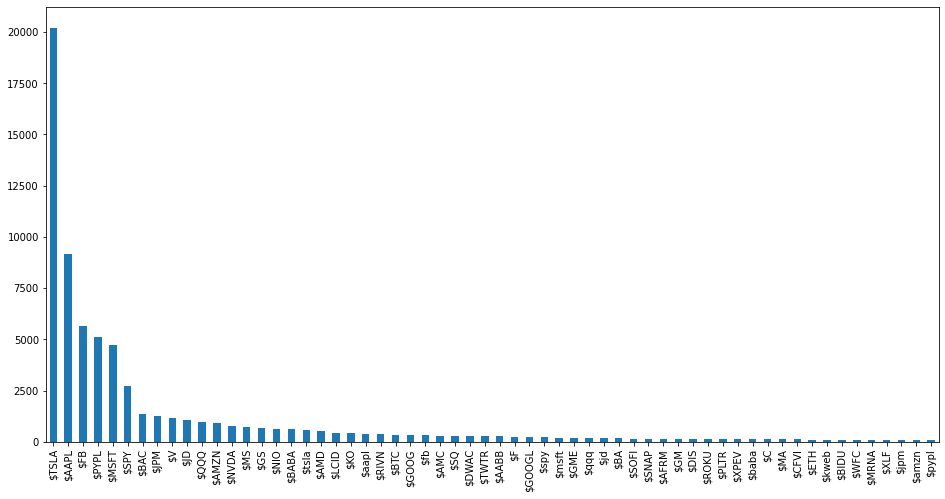

In [4]:
df['symbols'].value_counts().plot(kind='bar', figsize=(16, 8), fontsize=10)


WordCloud Generation

In [5]:
### compare different stocks
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

'''
given the column of adataframe, display the word cloud
'''
def show_wordcloud(column):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    for val in column:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


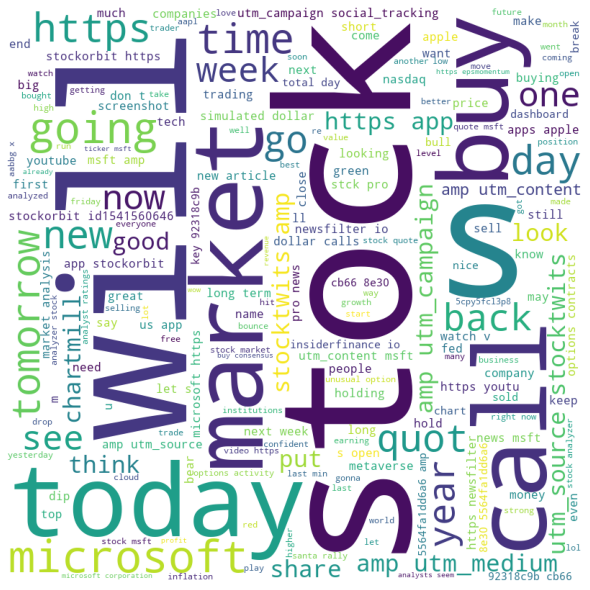

In [6]:
# MSFT
show_wordcloud(df[df['symbols']=="$MSFT"]['text'])

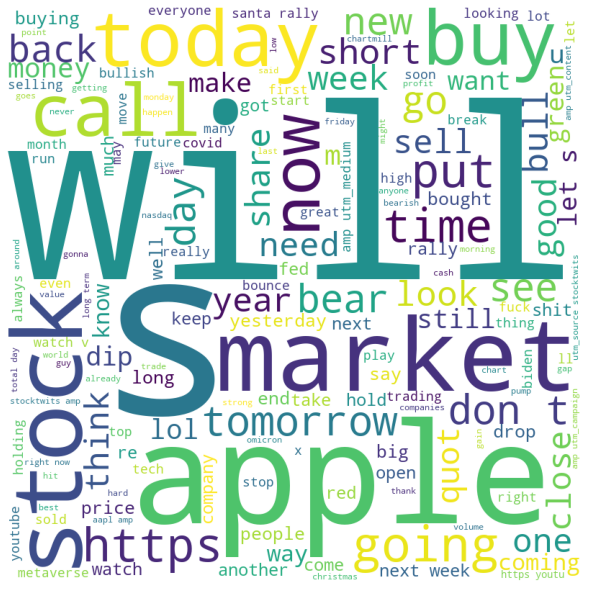

In [7]:
# AAPL
show_wordcloud(df[df['symbols']=="$AAPL"]['text'])

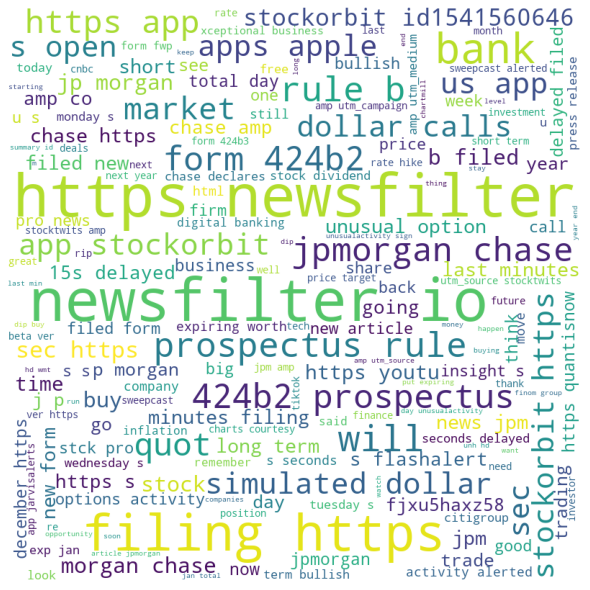

In [8]:
# AAPL
show_wordcloud(df[df['symbols']=="$JPM"]['text'])

from wordcloud: too many common words

Digging deep to tf-idf (+stopwords?)

In [9]:
# creating the document of MSFT
MSFT_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$MSFT'].text)])
MSFT_corpus = MSFT_corpus.replace('\n','')
MSFT_corpus[:100]

'Do we have luck this time ? Got rejected multiple times in past. RSI is also hot. The Santa Rally is'

In [10]:
# creating the document of AAPL
AAPL_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$AAPL'].text)])
AAPL_corpus = AAPL_corpus.replace('\n','')
AAPL_corpus[:100]

'it’s so easy to see insiders buying before the BIG ANNOUNCEMENT. Santa’s rally has an address to vis'

In [31]:
# creating the document of FB
FB_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$FB'].text)])
FB_corpus = FB_corpus.replace('\n','')
FB_corpus[:100]

'Do we have luck this time ? Got rejected multiple times in past. RSI is also hot. Imagine a world wh'

In [32]:
# creating the document of JPM
JPM_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$JPM'].text)])
JPM_corpus = JPM_corpus.replace('\n','')
JPM_corpus[:100]

'75+ on easing apple restrictions. Well i don&#39;t think i&#39;d be selling 4 months before a hike c'

In [33]:
corpus = [MSFT_corpus, AAPL_corpus, JPM_corpus, FB_corpus]

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# words to vector
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus) # fit corpus
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
# a dataframe with tf-idf scores
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
data = df_tfidf.transpose()
data.columns = ['MSFT', 'AAPL', 'JPM', 'FB']
data.head()

,MSFT,AAPL,JPM,FB
00,0.016333,0.017720,0.016332,0.019319
000,0.011252,0.017456,0.020905,0.013618
000000,0.000000,0.000507,0.000000,0.000000
0000000,0.000000,0.000000,0.000000,0.000607
0000005299,0.000548,0.000400,0.000000,0.000000


In [30]:
def wordcloud_tfidf(ind):
    # sort values and only store top 100 
    df = data.sort_values(by=[ind], ascending=False)
    df = df.iloc[:100]
    # generate wordcloud
    wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate_from_frequencies(df[ind])
    # set the figsize
    plt.figure(figsize=[12,6])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

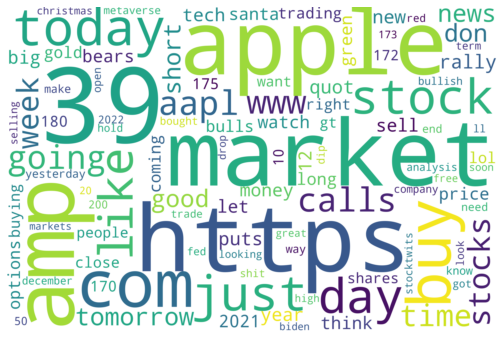

In [39]:
wordcloud_tfidf("AAPL")

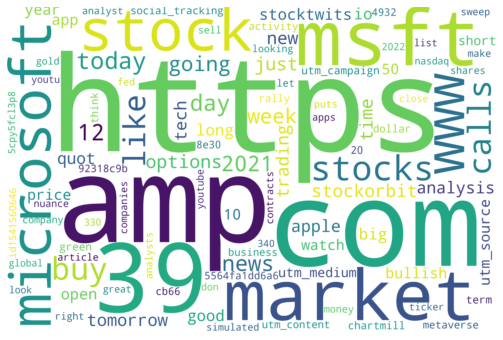

In [36]:
wordcloud_tfidf("MSFT")

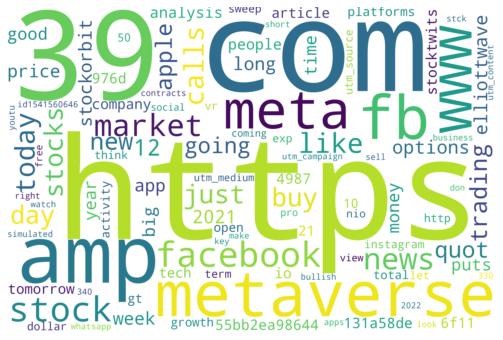

In [37]:
wordcloud_tfidf("FB")

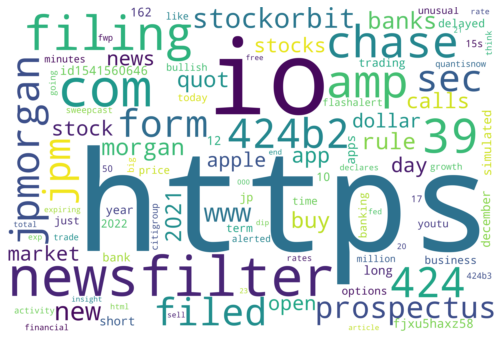

In [38]:
wordcloud_tfidf("JPM")